# Obtención de la constante de Hubble
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
%pylab inline
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import scipy.stats as st
import math
import random
from scipy.optimize import fmin
#plt.style.use('ggplot')
plt.style.use('classic')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


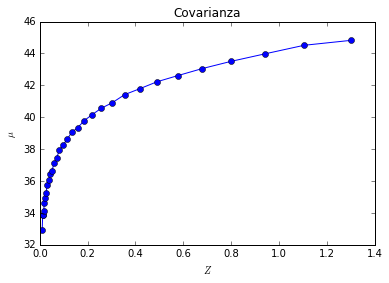

In [2]:
# Abrimos el arch. que contiene los datos 
f1=np.loadtxt('jla_mub_covmatrix.txt',delimiter = '\t',skiprows=0,usecols=[0,0]) 
f2=np.loadtxt('jla_mub.txt',delimiter = '\t',skiprows=0,usecols=[0,1]) 
covmatrix=f1[:,0]
z=f2[:,0]
mud=f2[:,1]
n=np.size(covmatrix) # Contabilizamos el número de datos que tenemos
plt.plot(z,mud,'bo', linestyle='-')
plt.title("Covarianza")
plt.xlabel("$Z$")
plt.ylabel("$\mu$")
plt.show()

In [3]:
cov=np.ones((31, 31))
m=0
for i in range(31):
    for j in range(31):
        cov[i][j]=covmatrix[m]
        m=m+1
var=np.diag(cov)

### Haciendo uso del logaritmo de la función maximizada de Likelihood

$-Ln(\mathfrak{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}} \right )^{2}$

In [4]:
# Prueba de la variable de materia
def test(om1,om0):
    test2=1
    while(test2):
        if(om1<0):
            om1=np.random.normal(om0,sigma)
            if(om1>1):
                om1=om0
        else:
            if(om1>1):
                om1=om0
            else:
                test2=0
    return(om1)

def eta(a,om):
    s3=(1.-om)/om
    s2=s3**(2./3)
    s=s3**(1./3)
    coef=[0.1540,0.4304,0.19097,0.066941]
    return 2.*np.sqrt(s3+1.)*((1./a**4)-coef[0]*s*(1./a**3)+coef[1]*s2*(1./a**2)+coef[2]*s3*(1./a)+coef[3]*(s**4))**(-1./8)
# Definición del likelihood
def likelihood(H,om,z,y,var):
    n=np.size(var)
    c=299792.0 # velocidad de la luz en km/s
    a=1./(1+z)
    D=(c/H)*(1./a)*(eta(1.,om)-eta(a,om))
    x= 25.-5.*np.log10(H/100.0)+5.*np.log10(D)
    arg=sum((((y-x)**2)/var))
    lhood=0.5*arg
    return lhood

Optimization terminated successfully.
         Current function value: 20.254409
         Iterations: 21
         Function evaluations: 42
[ 83.21318054]


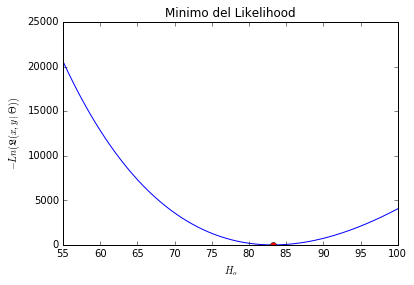

In [5]:
# Minimo de la función de Likelihood
num=1000
x=np.linspace(55.0,100,num)
y=np.zeros(num)
y2=likelihood(2*np.mean(mud),.38,z,mud,var)
x2=2*np.mean(mud)
robj = lambda x: likelihood(x,.38,z,mud,var)
for i in range(num):
    y[i]=likelihood(x[i],.38,z,mud,var)
x0 = 55.0
xmin0 = fmin(robj,x0)
print(xmin0)
plt.plot(x,y)
plt.plot(xmin0,likelihood(xmin0,.2,z,mud,var),'ro')
plt.title('Minimo del Likelihood')
plt.xlabel("$H_{o}$")
plt.ylabel("$-Ln(\mathfrak{L}(x,y \mid \Theta))$")

In [6]:
# Algoritmo del likelihood más óptimo
def mcp(y1,y0,H1,om1,H0,om0):
    ratio=y0/y1
    if(y1<y0):
        H0=H1
        om0=om1
    else:
        err = np.exp(-ratio)
        prob= random.randint(0,1)
        if(err>prob):
            H0=H1
            om0=om1
    global v
    v=[H0,om0]
    return v

In [7]:
# Vectores iniciales del método iterativo
H0=55.0
om0=0.2
# Parámetros iniciales de convergencia
random.seed(1)
sigma=.2
print("Ingrese el número máx. de iteraciones")
m=int(input())
sol1=np.zeros(m)
sol2=np.zeros(m)
pasos=np.zeros(m)
v=[H0,om0]
for i in range(m):
    pasos[i]=i
    H0=v[0]
    om0=v[1]
    H1=np.random.normal(v[0],2.*sigma)
    om1=np.random.normal(v[1],sigma/40.)
    om1=test(om1,om0)
    y0 = likelihood(v[0],v[1],z,mud,var)
    y1 = likelihood(H1,om1,z,mud,var)
    mcp(y1,y0,H1,om1,v[0],v[1])
    sol1[i]=v[0]
    sol2[i]=v[1]
print('Las soluciones son:',v[0],v[1])

Ingrese el número máx. de iteraciones
3000
('Las soluciones son:', 84.73122273967873, 0.2437093561087543)


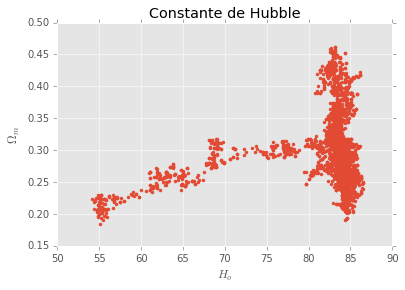

In [8]:
plt.style.use('ggplot')
plt.plot(sol1,sol2,'.')
plt.title('Constante de Hubble')
plt.xlabel("$H_{o}$")
plt.ylabel("$\Omega_{m}$")
plt.show()

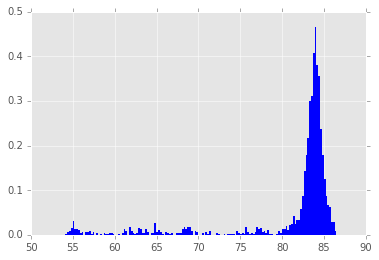

In [9]:
plt.hist(sol1, bins='auto', normed = True, facecolor='blue', edgecolor='none')
plt.show()

In [10]:
sol=[]
for i in range(np.size(sol1)):
    number=1
    if(sol1[i]>80.):
        sol.append(sol1[i])
sol=np.array(sol)

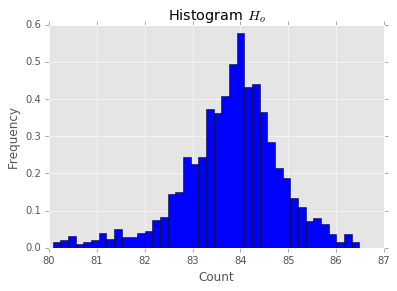

In [11]:
plt.hist(sol, bins='auto', normed = True, facecolor='blue', edgecolor='black')
plt.title("Histogram $H_{o}$")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

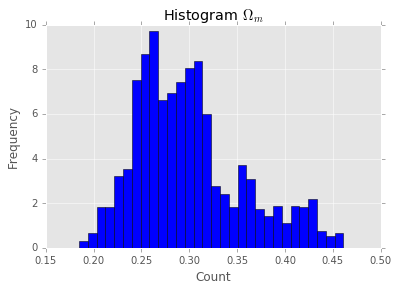

In [12]:
plt.hist(sol2, bins='auto', normed = True, facecolor='blue', edgecolor='black')
plt.title("Histogram $\Omega_{m}$")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()